# Trabajo Práctico 1 - Cálculo de Ranking Page

## Enunciado

### Pregunta 1 - ¿Por que la matriz A definida en (4) es equivalente a $p \ \mathbf{W} \ \mathbf{D} + e \ z^t$ ? Justificar.

Respuesta: 

Se define en (4) la matriz $A \in \mathbb{R}^{nxn}$ donde 
$$
a_{ij} = \left\{ 
\begin{array}{lr} 
(1-p)/n + pw_{ij}/c_j & : c_j \neq 0 \\ 
1/n & : c_j = 0 
\end{array} 
\right.
$$
Donde $ n$ es igual a la cantidad de paginas web. Luego se definen la matriz $ z \in \mathbb{R}^{nx1} $ y la matriz $ D \in \mathbb{R}^{nxn}$, donde 
$$
z_{j} = \left\{ 
\begin{array}{lr} 
(1-p)/n & \text{ si } c_j \neq 0 \\ 
1/n & \text{ si } c_j = 0 
\end{array} 
\right.
\qquad
\qquad
y
\qquad
\qquad
d_{jj} = \left\{ 
\begin{array}{lr} 
 1/c_j  & \text{ si } c_j \neq 0 \\  
0 & \text{ si } c_j = 0 
\end{array}
\right.
$$
Recordemos también que la matriz de conectividad $ W $ fue definida como
$$
w_{ij} = \left\{ 
\begin{array}{lr} 
1 & \text { si la pagina j tiene un link a la pagina i} \\ 
0 & \text { si no}
\end{array} 
\right.
$$

Podemos notar que la matriz $ z$ es un vector columna, entonces $ z^T\in\mathbb{R}^{1xn} $. Tambien se define $e $, un vector columna de unos de dimensión n. 




Por lo tanto, $ A = pWD + ez^T $.


### Pregunta 2 -  ¿Cómo se garantiza existencia de la factorización $LU$? ¿ La matriz $(\mathbf{I} - p \ \mathbf{W} \ \mathbf{D})$ está bien condicionada? ¿Cómo influye el valor de $p$?

---

## Implementación

Implementar la factorización $LU$ para resolver el sistema de ecuaciones (6) que permite hallar la solución buscada (es decir, el ranking de páginas). Se podrá utilizar la función **scipy.linalg.solve_triangular** para resolver sistemas triangulares.

En el siguiente cuerpo de la notebook se genera un test que va a evaluar la función que resuelve el sistema a través de un test unitario. La resolución debe realizarse en el archivo **funciones.py** que acompaña el **template-alumnos**.

In [33]:
from funciones import *

### Test Unitario
En el archivo funciones.py hay que implementar la función que obtienen el ranking de las páginas.
Se espera que el llamado a la siguiente función arroje un valor esperado

**************************************************
Test unitario 1
BIEN! - Paso correctamente el test unitario
**************************************************


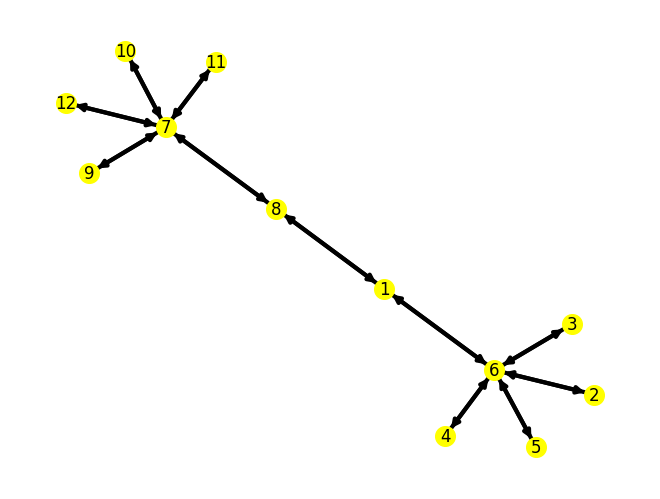

In [26]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test unitario 1')
try:
    assert(np.isclose(obtenerMaximoRankingScore(W, p), 0.1811, atol=0.0001))
except:
    print('OUCH!! - No paso el test unitario')
else:
    print('BIEN! - Paso correctamente el test unitario')
print('*'*50)


### Test Unitarios Adicionales

El grupo **deberá** proponer al menos 3 instancias de prueba no triviales, dos de las cuales deben ser de tipo TODOS LOS NODOS CONECTADOS, y otra de tipo NINGUNO CONECTADO. La tercera instancia queda a criterio del grupo.

Para el análisis, guiarse y responder las siguientes preguntas: 

* ¿Cómo es el ranking obtenido en cada caso de acuerdo a la estructura del grafo páginas? 
* ¿Qué conclusiones pueden sacar de la interpretación de los resultados?

Graficar los grafos usando las funciones en el **funciones.py**.

**************************************************
Test todos_conectados
Ranking: [0, 1, 5, 6, 7, 8, 2, 3, 4]
Score: [[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]]


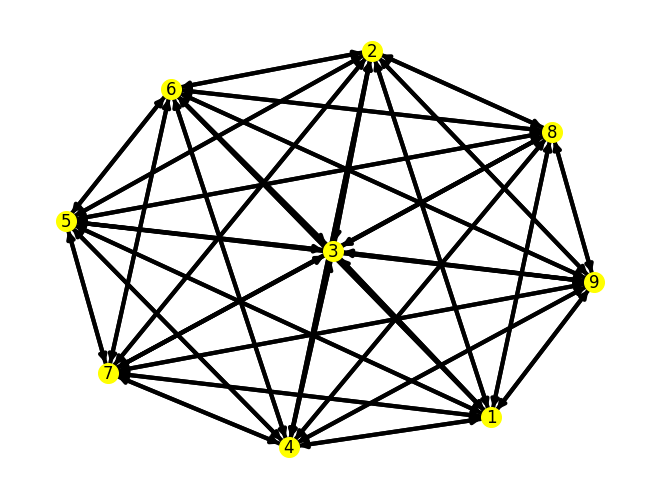

In [22]:
import numpy
#ARCHIVOS DE ENTRADA
archivo_test = './tests/todos_conectados.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test todos_conectados')
rnk, scr = calcularRanking(W,p)
print('Ranking:', rnk)
print('Score:', numpy.transpose(scr))


---

Podemos notar que al estar todos los nodos conectados entre sí, los scores son idénticos. Esto sucede porque: $\\$

$\hspace{5cm} \#links(\text{Páginas}[i]) = \#links(\text{Páginas}[j]) \quad \forall i, j \in \text{cantPáginas}(W) \\$ 

Luego, el orden de ranking de las paginas es indiferente ya que todos tienen el mismo score. $\\$
Veamos ahora que sucede con el ninguno_conectado:



**************************************************
Test todos_conectados
Ranking: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Score: [[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]]


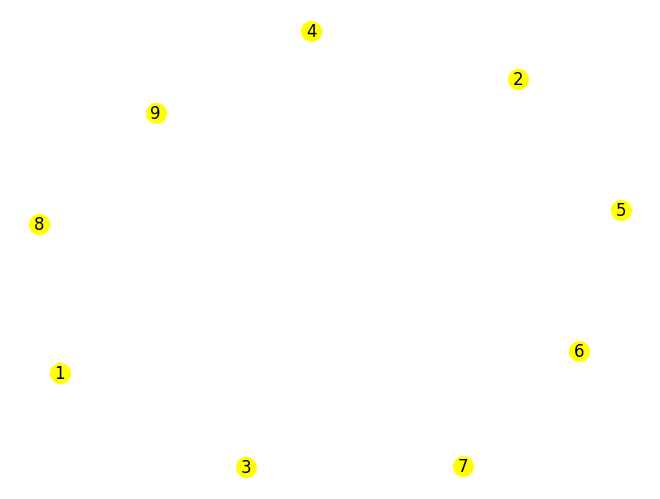

In [38]:
import numpy
#ARCHIVOS DE ENTRADA
archivo_test = './tests/ninguno_conectado.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test todos_conectados')
rnk, scr = calcularRanking(W,p)
print('Ranking:', rnk)
print('Score:', numpy.transpose(scr))

Notemos que sucede lo mismo que con el todos conectados, ya que en este caso todos los nodos tienen misma cantidad de links salientes (0 Links). $\\$
Viendo tanto este grafico como el anterior, podemos concluir en que mientras todos los nodos tengan la misma cantidad de links salientes, $\\$ 
siempre el score va a ser igual para todos por lo tanto generando un empate total en el ranking.
Ahora vamos a ir a el test inventado por nosotros el cual tiene la estructura de un Arbol:

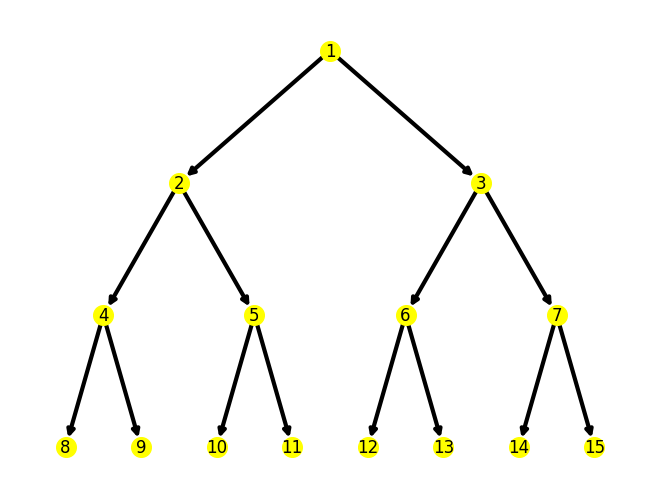

**************************************************
Test todos_conectados
Ranking: [7, 8, 9, 10, 11, 12, 13, 14, 3, 4, 5, 6, 1, 2, 0]
Score: [[0.0516129  0.06451613 0.06451613 0.06774194 0.06774194 0.06774194
  0.06774194 0.06854839 0.06854839 0.06854839 0.06854839 0.06854839
  0.06854839 0.06854839 0.06854839]]


In [37]:
import numpy
import networkx as nx
import matplotlib.pyplot as plt
import pydot 
import numpy as np
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_arbol.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

def dibujar_arbol(W, print_ejes=True):
    options = {
        'node_color': 'yellow',
        'node_size': 200,
        'width': 3,
        'with_labels': True
    }

    N = W.shape[0]
    G = nx.DiGraph()  # Utilizar un grafo dirigido

    # Agregar nodos al grafo
    G.add_nodes_from(range(1, N+1))

    # Agregar conexiones entre los nodos basados en la matriz de adyacencia
    for i in range(N):
        for j in range(N):
            if W[i][j] == 1:
                G.add_edge(j+1, i+1)  # Invertir la dirección del enlace

    # Generar un árbol dirigido BFS a partir del nodo raíz 1
    T = nx.bfs_tree(G, source=1)

    # Utilizar un layout más ordenado
    pos = {
        1: (0, 3),  # Nodo 1 arriba
        2: (-1, 2.5), 3: (1, 2.5),  # Nodos 2 y 3 un nivel abajo
        4: (-1.5, 2), 5: (-0.5, 2), 6: (0.5, 2), 7: (1.5, 2),  # Nodos 4, 5, 6 y 7 un nivel más abajo
        8: (-1.75, 1.5), 9: (-1.25, 1.5), 10: (-0.75, 1.5), 11: (-0.25, 1.5), 12: (0.25, 1.5), 13: (0.75, 1.5), 14: (1.25, 1.5), 15: (1.75, 1.5)  # Nodos 8 al 15 en el fondo
    }

    # Dibujar el árbol
    if print_ejes:
        print('Ejes: ', [e for e in T.edges])

    nx.draw(T, pos, **options)
    plt.show()

dibujar_arbol(W, False)

# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test todos_conectados')
rnk, scr = calcularRanking(W,p)
print('Ranking:', rnk)
print('Score:', numpy.transpose(scr))

Podemos ver como a medida que nos desplazamos por los niveles de este arbol los score aumentan cada vez mas, es decir: $\\$ $\hspace{1cm}$ $\\$
$\hspace{2cm} scr(nvl 1) < scr(nvl 2) < ... < scr(nvl Log(n)) < scr(nvl \ Log(n + 1)) \implies max(score) = scr(nvl \ Log(n + 1)) \\$ $\hspace{1cm}$ $\\$
Concluyendo asi que las paginas mejor rankeadas son las del ultimo nivel del arbol.

## Enunciado

Sobre los casos de test que se encuentran en el folder `tests`, se pide realizar los análisis siguientes para todos los grafos del folder.

### Análisis Cuantitativo

Para el análisis cuantitativo, se pide, como mínimo, estudiar los tiempos de procesamiento en función del tamaño del grafo de páginas y de la densidad del mismo. Para esto, se espera que presenten gráficos mostrando los tiempos de ejecución para obtener la solución en función de la cantidad de nodos/links de diferentes grafos de páginas aleatorios.


In [4]:
def tiempoEjecucion(W, p): 
    """Calcula el tiempo de ejecucion de obtenerMaximoRankingScore en segundos

    Args:
        W: matriz de conectividad
        p: parametro del navegante aleatorio

    Returns:
        tiempo_ejecucion
    """    # calcula el tiempo de ejecucion de obtenerMaximoRankingScore 
    inicio = time.time() # inicia cronometro
    obtenerMaximoRankingScore(W, p)
    fin = time.time() # termina cronometro
    tiempo_ejecucion = fin - inicio 
    
    return tiempo_ejecucion

def tiempoEjecucionSize (dimension,p): 
    """Calcula el tiempo de ejecucion en base a la dimension de W

    Args:
        dimension: dimensión de W
        p: parametro del navegante aleatorio

    Returns:
        lista_tiempo: lista con los tiempos de ejecucion
        lista_size: lista de dimensiones paralelo a los tiempos de ejecucion
    """    
    i=2 # hago que sea minimo 2x2
    lista_tiempo=[]
    lista_size=[]
    while i <= dimension:
        W= np.random.choice([0, 1], size=(i,i)) # creo W con dim(i,i) con links random
        np.fill_diagonal(W, 0)
        tiempo_ejecucion= tiempoEjecucion(W, p)
        lista_tiempo.append(tiempo_ejecucion)
        lista_size.append(i)
        i+=1

    return lista_tiempo, lista_size

def tiempoEjecucionDensidad (densidad_maxima,p,size):
    """Calcula el tiempo de ejecucion en base a la densidad de W (densidad = links/nodos.)

    Args:
        densidad_maxima: densidad máxima de W que se grafica
        p: parametro del navegante aleatorio
        size: dimension de W (matriz cuadrada size x size)

    Returns:
        lista_tiempo: lista con los tiempos de ejecucion
        lista_densidad: lista de densidades paralelo a los tiempos de ejecucion
    """    
    lista_tiempo = []
    lista_densidad = []

    for n in range(50, densidad_maxima * 50+1,50): # se elige 50 porque es un valor suficientemente alto para ver datos pero suficientemente bajo como para no romper la compu. igual cumple por lo explicado en notas. el valor de 50 es indifirente.
        W = np.zeros((size, size), dtype=int)
        np.fill_diagonal(W, 0)
        indices = np.random.choice(size * size, n, replace=False) 
        indices = np.unravel_index(indices, W.shape) # This line converts a flat index or array of flat indices into a tuple of coordinate arrays. Since we're dealing with a 2D array W, we use W.shape to specify its shape. This function essentially converts the flat indices obtained in the previous step into 2D indices that correspond to the positions in the original array W.
        W[indices] = 1
        tiempo_ejecucion= tiempoEjecucion(W, p)
        lista_tiempo.append(tiempo_ejecucion)
        lista_densidad.append(n/50)
    
    return lista_tiempo, lista_densidad
    

def regresionLin(x, y):
    slope, intercept, r, p, std_err = stats.linregress(x, y)   
    return np.multiply(slope, x) + intercept # es necesario pues float * lista se arregla con np.multiply :D

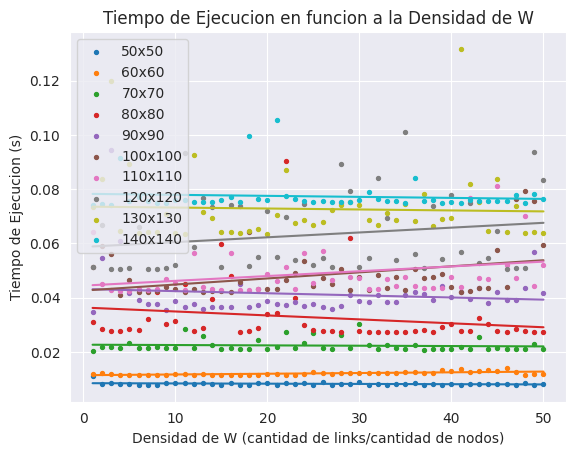

In [8]:
def graficarDensidadRegresion():
    sns.set_style("darkgrid")
    for i in range(10):
        tiempo, densidad = tiempoEjecucionDensidad (50,0.5,50+i*10)
        plt.scatter(densidad,tiempo,s=8, label=f'{50+i*10}x{50+i*10}')
        regresion_lineal = regresionLin(densidad, tiempo)
        plt.plot(densidad, regresion_lineal)

    plt.xlabel('Densidad de W (cantidad de links/cantidad de nodos)')
    plt.ylabel('Tiempo de Ejecucion (s)')
    plt.title('Tiempo de Ejecucion en funcion a la Densidad de W')
    plt.legend(fontsize='10')
    plt.grid(True)
    plt.show()   

graficarDensidadRegresion()

Observar que las lineas de regresion son constantes, o sea, en este caso la fuerza de regresion es nula. Esto es debido a que lo que realmente afecta al tiempo de ejecucion no es la densidad, sino la dimension. La complejidad algoritmica de procesar la matriz esta dada por la cantidad de ejecuciones que tiene que procesar mi algoritmo, no si en las posiciones hay 1 o 0. En este caso la complejidad es de $O(n^2)$, pues tenemos una matriz cuadrada. Veamos el tiempo de ejecucion en funcion al tamaño de W a continuacion:

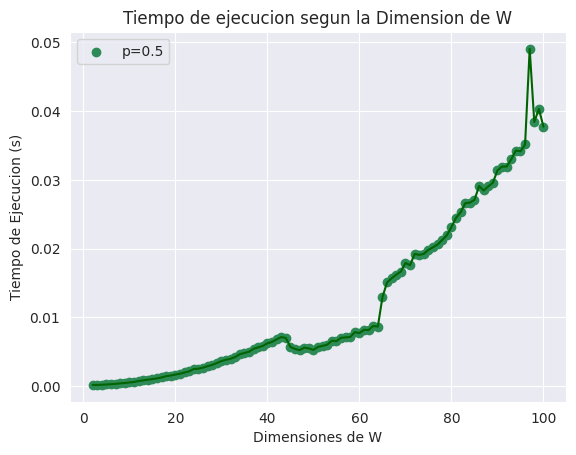

In [12]:
def graficarDimension():    
    for i in range(5):
        lista_tiempo, lista_size = tiempoEjecucionSize(100, 0.5)

    sns.set_style("darkgrid")
    plt.scatter(lista_size,lista_tiempo, color='seagreen', label='p=0.5')
    plt.plot(lista_size,lista_tiempo, color='darkgreen', linestyle='-')
    plt.xlabel('Dimensiones de W')
    plt.ylabel('Tiempo de Ejecucion (s)')
    plt.title('Tiempo de ejecucion segun la Dimension de W')
    plt.legend()
    plt.grid(True)
    plt.show()

graficarDimension()

En efecto, lo que importa es el tamaño. La curva tiene una clara tendencia polinomial, que en este caso va acorde a lo dicho anteriormente: como estamos trabajando con matrices de tamaño $n $ x $ n$, la cantidad de operacion es de $n^2$. Hay una clara correlacion entre el tiempo de ejecucion y la complejidad algoritmica. Veamos si hay errores significativos en el calculo del ranking para concluir si realmente vale lo dicho anteriormente o no:

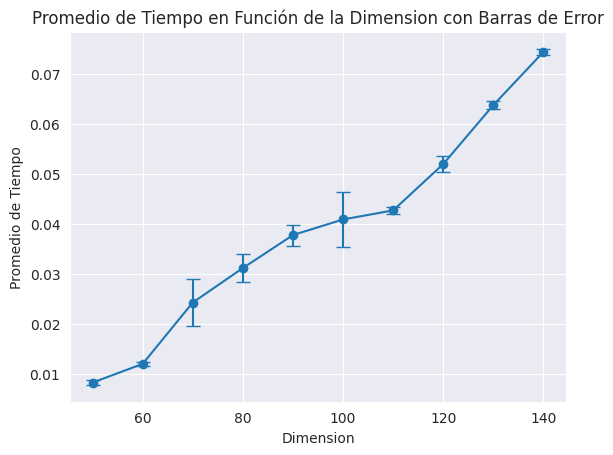

In [15]:
def graficarDimensionPlotError():
    promedios_tiempo = []
    errores_tiempo = []
    densidades = []

    for i in range(10):
        tiempo, densidad = tiempoEjecucionDensidad(50, 0.5, 50+i*10)
        promedios_tiempo.append(np.mean(tiempo))
        errores_tiempo.append(np.std(tiempo))
        densidades.append(50+i*10)

    sns.set_style("darkgrid")
    plt.errorbar(densidades, promedios_tiempo, yerr=errores_tiempo, fmt='o-', capsize=5)
    plt.xlabel('Dimension')
    plt.ylabel('Promedio de Tiempo')
    plt.title('Promedio de Tiempo en Función de la Dimension con Barras de Error')
    plt.grid(True)
    plt.show()

graficarDimensionPlotError()

### Análisis Cualitativo

Para el análisis cualitativo se deberán estudiar los rankings obtenidos, en función de la estructura del grafo, y del valor de $p$. Para esto, se espera que presenten gráficos mostrando las probabilidades de las páginas mejor rankeadas en función del valor de $p$. 


In [16]:
def calculoProbabilidadesRanking(W):
    lista_top1 = []
    lista_top2 = []
    lista_top3 = []
    valores_p = np.linspace(0.01, 0.99, 99)

    for p in valores_p:
        ranking, scr =  calcularRanking(W, p)
        lista_top1.append(ranking[0])
        lista_top2.append(ranking[1])
        lista_top3.append(ranking[2])

    return lista_top1, lista_top2, lista_top3

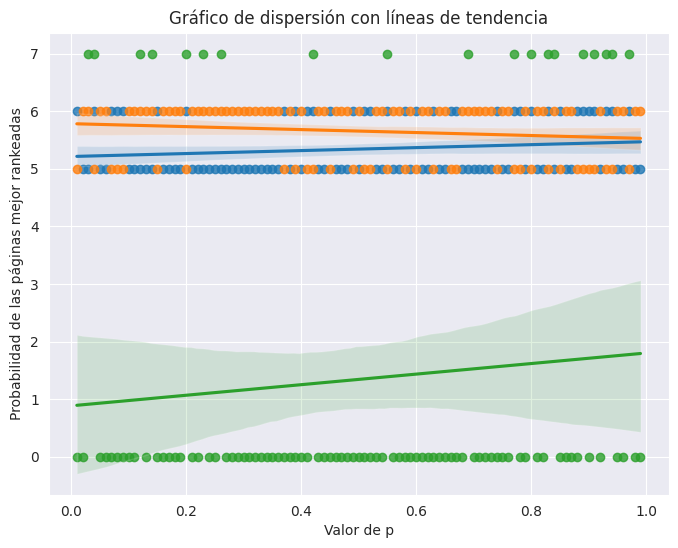

In [19]:
def graficarProbabilidadesRanking():
    """
    Crea un gráfico de dispersión con líneas de contorno para visualizar la relación entre
    el valor de p y las probabilidades de las páginas mejor rankeadas.

    Argumentos:
    - p_values: Una secuencia de valores de p.
    - probabilidades: Una secuencia de probabilidades de las páginas mejor rankeadas correspondientes a los valores de p.
    """
    archivo_test = '/home/tiagobusso/Documentos/tp-alc/Recursos TP1-20240502/template-alumnos/template-alumnos/tests/test_dosestrellas.txt'
    W = leer_archivo(archivo_test)
    lista_top1, lista_top2, lista_top3 = calculoProbabilidadesRanking(W)
    valores_p = np.linspace(0.01, 0.99, 99)
    
    # Crear el gráfico de dispersión con líneas de contorno
    sns.set_style(style="darkgrid")
    plt.figure(figsize=(8, 6))
    # sns.plot(x=probabilidades, y=ranking, color='blue', scatter_kws={'s': 50}, line_kws={'color': 'yellow', 'linewidth': 2})
    sns.regplot(x=valores_p, y=lista_top1)
    sns.regplot(x=valores_p, y=lista_top2)
    sns.regplot(x=valores_p, y=lista_top3)

    plt.xlabel('Valor de p')
    plt.ylabel('Probabilidad de las páginas mejor rankeadas')
    plt.title('Gráfico de dispersión con líneas de tendencia')
    plt.show()

graficarProbabilidadesRanking()


### Dos estrellas

Para el caso **test_dosestrellas.txt** se pregunta: 

¿Cuál es la mínima cantidad de links que se deben agregar para que la pagina correspondiente al nodo 1 quede primera en el ranking? ¿ Cómo se modificó la conectividad? Analizar.



Notemos que la pagina correspondiente al nodo 1 es la 3era pagina en el orden del ranking. Por delante de la misma se encuentran las paginas correspondientes a los nodos 6 y 7 que se encuentran empatados con un scr de aproximadamente 1,81. 

Observando el ranking que nos da el test dos estrellas ([6, 7, 1, 8, 2, 3, 4, 5, 9, 10, 11, 12]) vemos lo siguiente: $\\$
Los scoring mas altos son los de las paginas 6 y 7 empatados con aprox 1.81, Luego los siguen las oaginas 1 y 8 con aprox 0.79 y por ultimo quedan
las paginas 2, 3, 4, 5, 9, 10, 11, 12 empatadas todas con aprox 0.059. 


A simple vista tenemos dos opciones para que solo agregando links la pagina correspondiente al nodo 1 quede primera en el ranking de: $\\$
Opcion 1: Hacer a las paginas 6 y 7 menos importantes bajando asi su scoring y quedando la 1 por encima de ellas. 
          Para generar esto deberiamos agregar varios links salientes de las paginas 6 y 7 para que estas bajen su importancia.

Opcion 2: Aumentar la importancia de la pagina 1 de forma tal que sobrepase a las paginas 6 y 7.
          Para generar esto deberiamos agregar varios links entrantes a la pagina 1.

Veamos primero la opcion 1:



**************************************************
Test todos_conectados
Ranking: [5, 6, 0, 7, 1, 2, 3, 4, 8, 9, 10, 11]
Score: [[0.08785214 0.0699601  0.0699601  0.0699601  0.0699601  0.20354991
  0.15876893 0.07156815 0.04960511 0.04960511 0.04960511 0.04960511]]


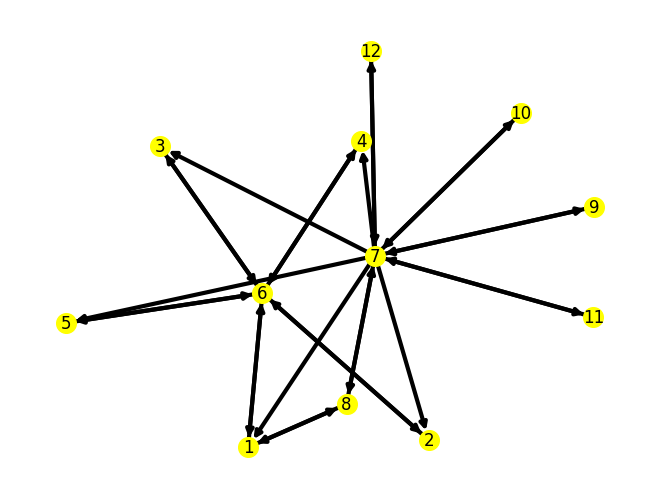

In [39]:
import numpy
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas_op1.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test todos_conectados')
rnk, scr = calcularRanking(W,p)
print('Ranking:', rnk)
print('Score:', numpy.transpose(scr))

En este archivo de test agregamos 5 links salientes a la pagina 7, teniendo asi esta links hacia todas las paginas. Podemos notar que el score de esta pagina bajo a 0.15 por lo que no es suficiente para hacer que el score sea mas bajo que el de la pagina corresponiente al nodo 1, por lo que esta opcion no es factible.

Veamos la opcion 2:

**************************************************
Test todos_conectados
Ranking: [0, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 11]
Score: [[0.15120275 0.05670103 0.05670103 0.05670103 0.05670103 0.15034364
  0.15034364 0.09450172 0.05670103 0.05670103 0.05670103 0.05670103]]


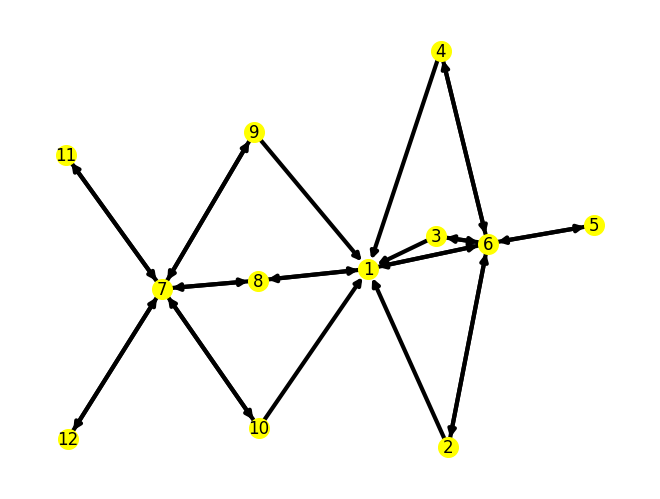

In [43]:
import numpy
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas_op2.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test todos_conectados')
rnk, scr = calcularRanking(W,p)
print('Ranking:', rnk)
print('Score:', numpy.transpose(scr))

En este test buscamos agregarle links a la pagina 1 para aumentar su importancia. A su vez buscamos agregar links salientes a las paginas que envian links tambien hacia las paginas 6 y 7 de forma tal que la importancia de estas paginas sea menor para que el score de 6 y 7 se vea disminuido. Veamoslo explicito con el ejemplo:

Agregamos los siguientes links:
9 -> 1
10 -> 1
4 -> 1
3 -> 1
2 -> 1

Notemos que añadimos un link del 7 al 1, ya que al 7 ser la pagina de mayor importancia es un strong link hacia nuestra pagina 1.
Luego agregamos los links del 9 y 10, de esta forma aumentamos aun mas la importancia de la pagina 1 y por lo contrario la importancaia de las paginas 9 y 10 se ve disminuida por ende la del 7 tambien ya que estos tenian un puntero hacia la misma.
Por ultimo hicimos lo mismo que con el caso del 4, 3 y 2 ya que estos bajan la importancia del 6 pues constituyen los punteros hacia el mismo.

Podemos observar que en el caso de la estrella del 6 hubo que agregar un link mas, esto es debido a que el 1 tiene un puntero al 6 y el link del 1 es cada vez mas fuerte por lo que inevitablemente hay que debilitar mas a los demas links del 6.
